In [1]:
# standard libraries
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import os
import re

# plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# get the datetime library for date & time calcs
from datetime import datetime, timedelta

# for handling excel
from openpyxl import Workbook
from openpyxl import load_workbook

In [2]:
os.getcwd()

'C:\\Users\\n846490\\Documents\\Python Scripts\\SurvivalAnalysis'

In [3]:
os.chdir(os.path.normpath('C:/Users/n846490/Documents/Python Scripts/SurvivalAnalysis/ChurnModelFiles/'))

In [4]:
# get the revenue table

urlRev = os.path.normpath('C:/Users/n846490/Documents/Python Scripts/SurvivalAnalysis/ChurnModelFiles/prodRevData.csv')
data = pd.read_csv(urlRev, index_col=0)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936358 entries, 0 to 936357
Data columns (total 26 columns):
CustID             936358 non-null object
OpenedChecking     936358 non-null int64
EHI                724063 non-null float64
TotAssets          724063 non-null float64
EqiScore           724063 non-null float64
VinScore           724063 non-null float64
Rev2016            936358 non-null float64
Rev2015            936358 non-null float64
Rev2014            936358 non-null float64
State              936358 non-null object
Channel            936358 non-null object
Age                936358 non-null float64
Cleancuststart     936358 non-null object
Custyears          936358 non-null float64
Closed             936358 non-null int64
Footprint          936358 non-null object
NumProducts        936358 non-null float64
Open               936358 non-null int64
OpenAccts          936358 non-null float64
CdiraOpen          936358 non-null float64
CheckingOpen       936358 non-null float

In [6]:
# need to get other csat files

# Import the deposit inquiry data
csat1 = pd.ExcelFile(os.path.normpath('C:/Users/n846490/Documents/DataScience/XLSX/miscSurveyData.xlsx'))

csat2 = pd.ExcelFile(os.path.normpath('C:/Users/n846490/Documents/DataScience/XLSX/HistoricalDataCSAT.xlsx'))

# Load the xls file's sheets as dataframes
misc = csat1.parse('Sheet1')

ath = csat2.parse('ATHPower')

grassRoots = csat2.parse('Grassroots')




In [7]:
ath.head()

,Survey_Date,Survey_Score,FJNumber,How would you rate your overall experience with this visit?
0,2015-04-02,0,F000166609,Satisfied
1,2015-04-02,0,F002627490,Satisfied
2,2015-04-02,0,F001590896,Satisfied
3,2015-04-02,100,F001675265,Highly Satisfied
4,2015-04-02,100,F003560393,Highly Satisfied


In [8]:
grassRoots.head()

,Comp Date,FJNumber,VISIT_SAT
0,2014-01-02,F000115223,5.0
1,2014-01-02,F000133876,5.0
2,2014-01-02,F000134623,5.0
3,2014-01-02,F000139906,4.0
4,2014-01-02,F000145029,5.0


In [9]:
misc.head()

,SurveyDate,Fjnumber,OverallSatisfied
0,2015-04-03,F006034881,Neutral
1,2015-04-03,F006037293,Highly Satisfied
2,2015-04-03,F006036086,Dissatisfied
3,2015-04-03,F006039104,Highly Satisfied
4,2015-04-03,F006040937,Highly Satisfied


In [10]:
# clean up the column names for consistency

athNames = {'Survey_Date': 'SurveyDate', 'Survey_Score': 'SurveyScore', 'FJNumber':'CustID',
            'How would you rate your overall experience with this visit?':'Satisfaction'}

grassNames = {'Comp Date': 'SurveyDate', 'FJNumber':'CustID','VISIT_SAT':'Satisfaction'}

miscNames = {'SurveyData': 'SurveyDate', 'Fjnumber':'CustID','OverallSatisfied':'Satisfaction'}

ath.rename(columns=athNames, inplace=True)

grassRoots.rename(columns=grassNames, inplace=True)

misc.rename(columns=miscNames, inplace=True)

In [11]:
ath.head()

,SurveyDate,SurveyScore,CustID,Satisfaction
0,2015-04-02,0,F000166609,Satisfied
1,2015-04-02,0,F002627490,Satisfied
2,2015-04-02,0,F001590896,Satisfied
3,2015-04-02,100,F001675265,Highly Satisfied
4,2015-04-02,100,F003560393,Highly Satisfied


In [12]:
# drop the score from ath

ath.drop('SurveyScore', axis=1, inplace=True)


In [13]:
# stack the data into one

csat = ath.append(grassRoots)



In [14]:
csat = csat.append(misc)

In [15]:
csat.shape[0]

153051

In [16]:
csat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153051 entries, 0 to 23802
Data columns (total 3 columns):
SurveyDate      153034 non-null datetime64[ns]
CustID          153034 non-null object
Satisfaction    152892 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 4.7+ MB


In [17]:
# get the counts of the customers by satisfaction rating

csat.groupby(['Satisfaction']).agg({'Satisfaction' : pd.Series.count})

,Satisfaction
Satisfaction,
1.0,1777
2.0,1875
3.0,3192
4.0,8823
5.0,38790
Dissatisfied,2550
Highly Dissatisfied,2035
Highly Satisfied,67215
Neutral,3768


In [18]:
# one last cleanup on the channel

def clean_satisfaction(row):
    if str(row) == '5.0':
        return 'Highly Satisfied'
    elif str(row) == '4.0':
        return 'Satisfied'
    elif str(row) == '3.0':
        return 'Neutral'
    elif str(row) == '2.0':
        return 'Dissatisfied'
    elif str(row) == '1.0':
        return 'Highly Dissatisfied'
    elif pd.isnull(row):
        return 'Unknown'
    else:
        return str(row)
    


In [19]:
csat['Satisfaction'] = csat['Satisfaction'].apply(clean_satisfaction)

In [25]:
# check the results

csat.groupby(['Satisfaction']).agg({'Satisfaction' : pd.Series.count})

,Satisfaction
Satisfaction,
Satisfaction,1


In [21]:
csat['Satisfaction'].describe()

count               153051
unique                   6
top       Highly Satisfied
freq                106005
Name: Satisfaction, dtype: object

In [22]:
csat['Satisfaction'].isnull().sum()

0

In [23]:
# preserve the data and write to csv

csat.to_csv('csatHistory.csv')

In [31]:
# make an ordered factor
# raw_cat = pd.Categorical(["a","b","c","a"], categories=["b","c","d"],ordered=True)

labels = ['Highly Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Highly Dissatisfied', 'Unknown']

csat['Satisfaction'] = pd.Categorical(csat['Satisfaction'], categories = labels, ordered=True)

In [41]:
# reload the data

urlCsat = os.path.normpath('C:/Users/n846490/Documents/Python Scripts/SurvivalAnalysis/ChurnModelFiles/csatHistory.csv')
csat = pd.read_csv(urlCsat, index_col=0)

In [42]:
csat.head()

,SurveyDate,CustID,Satisfaction
0,2015-04-02,F000166609,Satisfied
1,2015-04-02,F002627490,Satisfied
2,2015-04-02,F001590896,Satisfied
3,2015-04-02,F001675265,Highly Satisfied
4,2015-04-02,F003560393,Highly Satisfied


In [43]:
# check the results

csat.groupby(['Satisfaction']).agg({'Satisfaction' : pd.Series.count})

,Satisfaction
Satisfaction,
Dissatisfied,4425
Highly Dissatisfied,3812
Highly Satisfied,106005
Neutral,6960
Satisfied,31690
Unknown,159


In [52]:
# check the null survey dates

csat['SurveyDate'].isnull().sum()

0

In [51]:
# drop the null dates
# there were 17 null dates

filter = pd.isnull(csat['SurveyDate'])

# keep all items not in the filter
csat = csat[~filter]

In [56]:
# create a MonthYear column and sort
# first convert SurveyDate to a date object

# csat.info()

# csat['SurveyDate'] = pd.to_datetime(csat['SurveyDate'], format='%Y-%m-%d')

# create the MonthYear column for easy plotting

# csat['MonthYear'] = csat['SurveyDate'].apply(lambda x: x.strftime('%b-%y'))


# sort by survey date

csat = csat.sort_values(by='SurveyDate')

# csat = csat.drop(csat['index'], inplace = True)

In [59]:
# make a column for plotting later

csat.head()



,SurveyDate,CustID,Satisfaction,MonthYear
0,2014-01-02,F000115223,Highly Satisfied,Jan-14
15,2014-01-02,F003778155,Highly Satisfied,Jan-14
14,2014-01-02,F003308950,Highly Satisfied,Jan-14
13,2014-01-02,F002779724,Highly Satisfied,Jan-14
12,2014-01-02,F001519740,Highly Satisfied,Jan-14


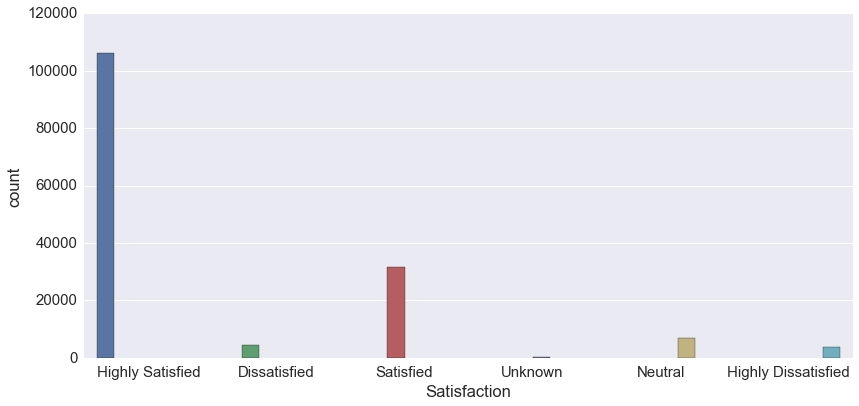

In [60]:

sns.set(font_scale=1.5)

sns.factorplot(x = 'Satisfaction', data = csat, kind = 'count', legend = 'True', hue = 'Satisfaction', size = 6, aspect = 2)
# plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

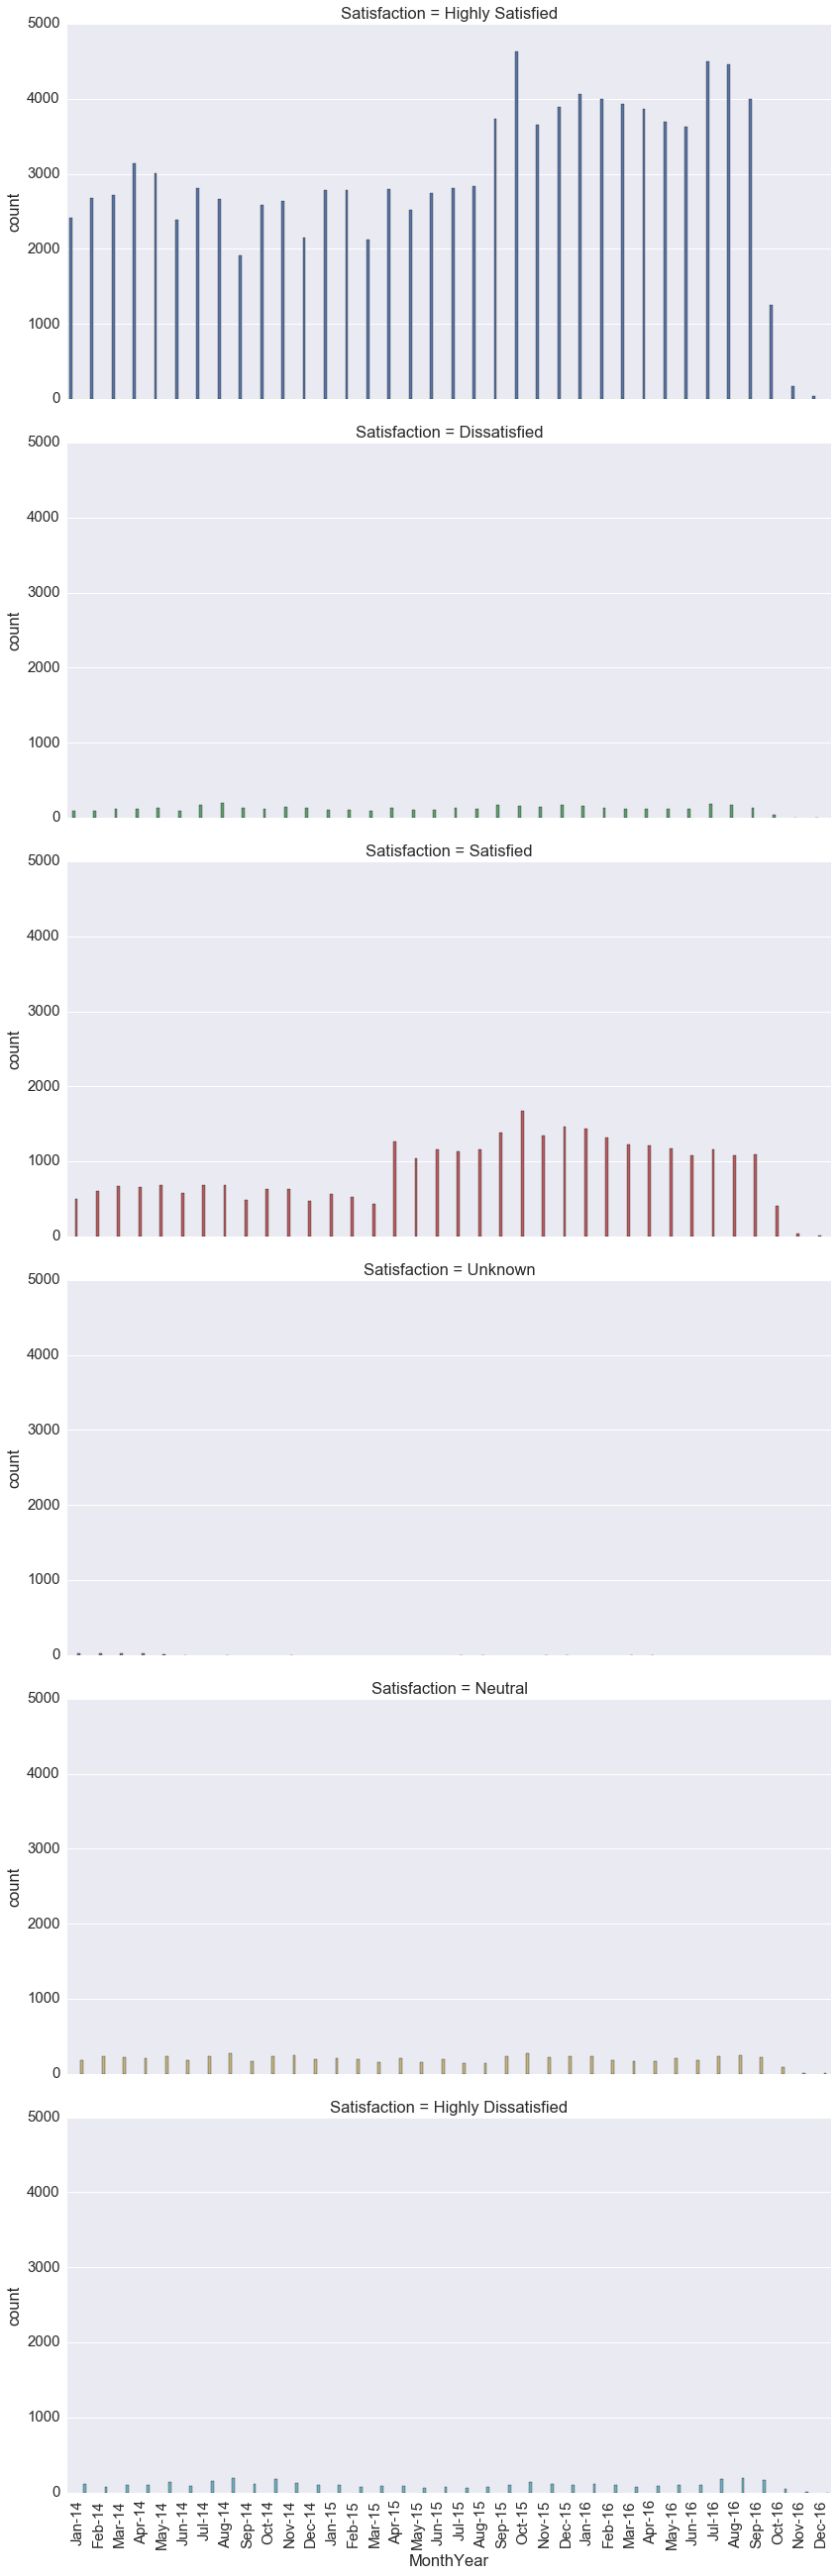

In [64]:
# plot ratings by month

sns.factorplot(x = 'MonthYear', data = csat, kind = 'count', legend = 'True', row = 'Satisfaction', hue = 'Satisfaction', size = 6, aspect = 2)
plt.xticks(rotation=90)

In [71]:
# examine highly dissatisfied
# outFoot = recentChecking[(recentChecking['Footprint'] == 'Out')]

# using an or operator alldata_balance = alldata[(alldata[IBRD] !=0) | (alldata[IMF] !=0)]

dis = csat[(csat['Satisfaction'] == 'Highly Dissatisfied') | (csat['Satisfaction'] == 'Dissatisfied') | (csat['Satisfaction'] == 'Neutral')]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

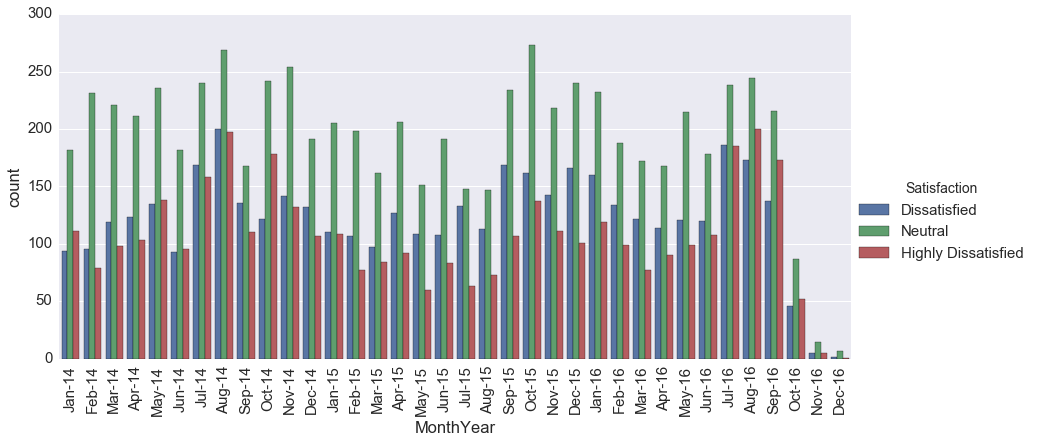

In [72]:
# plot ratings by month

sns.factorplot(x = 'MonthYear', data = dis, kind = 'count', legend = 'True', hue = 'Satisfaction', size = 6, aspect = 2)
plt.xticks(rotation=90)

In [74]:
# export before final transformation

csat.to_csv('csatHistorySorted.csv')

In [75]:
# make a wide version
# encoding categorical data

#first make a copy
csat2 = csat.copy()


cols_to_transform = ['Satisfaction']
csatWide = pd.get_dummies(data = csat2, columns = cols_to_transform)

csatWide.head()

,SurveyDate,CustID,MonthYear,Satisfaction_Dissatisfied,Satisfaction_Highly Dissatisfied,Satisfaction_Highly Satisfied,Satisfaction_Neutral,Satisfaction_Satisfied,Satisfaction_Unknown
0,2014-01-02,F000115223,Jan-14,0.0,0.0,1.0,0.0,0.0,0.0
15,2014-01-02,F003778155,Jan-14,0.0,0.0,1.0,0.0,0.0,0.0
14,2014-01-02,F003308950,Jan-14,0.0,0.0,1.0,0.0,0.0,0.0
13,2014-01-02,F002779724,Jan-14,0.0,0.0,1.0,0.0,0.0,0.0
12,2014-01-02,F001519740,Jan-14,0.0,0.0,1.0,0.0,0.0,0.0


In [173]:
csatWide.shape[0]

153034

In [174]:
# perform the aggregation

csatGrouped = csatWide.groupby(['CustID'], as_index = False).max()

In [175]:
csatGrouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122274 entries, 0 to 122273
Data columns (total 9 columns):
CustID                              122274 non-null object
SurveyDate                          122274 non-null datetime64[ns]
MonthYear                           122274 non-null object
Satisfaction_Dissatisfied           122274 non-null float64
Satisfaction_Highly Dissatisfied    122274 non-null float64
Satisfaction_Highly Satisfied       122274 non-null float64
Satisfaction_Neutral                122274 non-null float64
Satisfaction_Satisfied              122274 non-null float64
Satisfaction_Unknown                122274 non-null float64
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 9.3+ MB


In [176]:
csatGrouped.head(20)

,CustID,SurveyDate,MonthYear,Satisfaction_Dissatisfied,Satisfaction_Highly Dissatisfied,Satisfaction_Highly Satisfied,Satisfaction_Neutral,Satisfaction_Satisfied,Satisfaction_Unknown
0,F000002021,2014-02-21,Feb-14,0.0,0.0,0.0,0.0,1.0,0.0
1,F000004727,2015-12-11,Dec-15,0.0,0.0,1.0,0.0,0.0,0.0
2,F000007264,2016-03-16,Mar-16,0.0,0.0,1.0,0.0,0.0,0.0
3,F000010067,2016-08-15,Aug-16,0.0,0.0,0.0,0.0,1.0,0.0
4,F000010523,2016-08-16,Aug-16,0.0,0.0,0.0,0.0,1.0,0.0
5,F000010989,2014-11-20,Nov-14,0.0,0.0,0.0,0.0,1.0,0.0
6,F000014545,2014-07-22,Jul-14,0.0,0.0,0.0,0.0,1.0,0.0
7,F000015829,2016-05-03,May-16,0.0,0.0,1.0,0.0,0.0,0.0
8,F000017618,2016-01-21,Jan-16,0.0,0.0,0.0,1.0,1.0,0.0
9,F000017902,2014-10-03,Oct-14,0.0,0.0,0.0,0.0,1.0,0.0


In [179]:
csatGrouped.shape[0]

122274

In [178]:
# clean up the column names

# remove the word Category_
# wideData.rename(columns=lambda x: x.replace('Category_', ''), inplace=True)

# remove the dashes
#wideData.rename(columns=lambda x: x.replace(' - ', ''), inplace=True)

# change spaces to _ 
#wideData.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

# change to title case
#wideData.rename(columns=lambda x: x.title(), inplace=True)


# remove the word Category_
csatGrouped.rename(columns=lambda x: x.replace('Satisfaction_', ''), inplace=True)

# change to title case
csatGrouped.head()

,CustID,SurveyDate,MonthYear,Dissatisfied,Highly Dissatisfied,Highly Satisfied,Neutral,Satisfied,Unknown
0,F000002021,2014-02-21,Feb-14,0.0,0.0,0.0,0.0,1.0,0.0
1,F000004727,2015-12-11,Dec-15,0.0,0.0,1.0,0.0,0.0,0.0
2,F000007264,2016-03-16,Mar-16,0.0,0.0,1.0,0.0,0.0,0.0
3,F000010067,2016-08-15,Aug-16,0.0,0.0,0.0,0.0,1.0,0.0
4,F000010523,2016-08-16,Aug-16,0.0,0.0,0.0,0.0,1.0,0.0


In [90]:
# drop the unknown
# wideRed = wideData[list(wideData.columns[1:3]) 

csatGrouped = csatGrouped.iloc[:,0:8].copy()

csatGrouped.head()

,CustID,SurveyDate,MonthYear,Dissatisfied,Highly Dissatisfied,Highly Satisfied,Neutral,Satisfied
0,F000002021,2014-02-21,Feb-14,0.0,0.0,0.0,0.0,1.0
1,F000004727,2015-12-11,Dec-15,0.0,0.0,1.0,0.0,0.0
2,F000007264,2016-03-16,Mar-16,0.0,0.0,1.0,0.0,0.0
3,F000010067,2016-08-15,Aug-16,0.0,0.0,0.0,0.0,1.0
4,F000010523,2016-08-16,Aug-16,0.0,0.0,0.0,0.0,1.0


In [180]:
# export for future use

csatGrouped.to_csv('csatGroupedDummy.csv')

In [92]:
data.shape[0]

936358

In [129]:
# reduce the csat data remove the MonthYear

csatGrouped = csatGrouped.iloc[:,[0,1,3,4,5,6,7]]

csatGrouped.head()

,CustID,SurveyDate,Dissatisfied,Highly Dissatisfied,Highly Satisfied,Neutral,Satisfied
0,F000002021,2014-02-21,0.0,0.0,0.0,0.0,1.0
1,F000004727,2015-12-11,0.0,0.0,1.0,0.0,0.0
2,F000007264,2016-03-16,0.0,0.0,1.0,0.0,0.0
3,F000010067,2016-08-15,0.0,0.0,0.0,0.0,1.0
4,F000010523,2016-08-16,0.0,0.0,0.0,0.0,1.0


In [1]:
# check on variable types
# SurveyDate is datetime type

# csatGrouped['SurveyDate'].dtype

# check the data type to confirm equal 
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

NameError: name 'np' is not defined

In [155]:
csatcheck = csat.sort_values(by='CustID')

csatcheck.head(10)

,SurveyDate,CustID,Satisfaction,MonthYear
3913,2014-02-21,F000002021,Satisfied,Feb-14
40580,2015-12-11,F000004727,Highly Satisfied,Dec-15
58194,2016-03-16,F000007264,Highly Satisfied,Mar-16
14521,2016-08-15,F000010067,Satisfied,Aug-16
14841,2016-08-16,F000010523,Satisfied,Aug-16
40175,2014-11-20,F000010989,Satisfied,Nov-14
26659,2014-07-22,F000014545,Satisfied,Jul-14
65074,2016-05-03,F000015829,Highly Satisfied,May-16
9588,2014-04-30,F000017618,Neutral,Apr-14
47801,2016-01-21,F000017618,Satisfied,Jan-16


In [156]:
datacheck = data.sort_values(by='CustID')

datacheck.head(10)

,CustID,OpenedChecking,EHI,TotAssets,EqiScore,VinScore,Rev2016,Rev2015,Rev2014,State,...,NumProducts,Open,OpenAccts,CdiraOpen,CheckingOpen,Credit_CardOpen,InvestmentsOpen,MortgageOpen,SavingsOpen,TotRev
72,F10000,1,41118.0,8848.0,601.0,625.0,224.39,0.08,0.00,RI,...,3.0,2,2.0,0.0,1.0,0.0,0.0,0.0,0.0,224.47
124032,F1000008,0,44661.0,14813.0,625.0,677.0,103.20,62.87,96.51,CT,...,6.0,4,4.0,1.0,2.0,0.0,0.0,0.0,1.0,262.58
11009,F100001,0,66536.0,299482.0,716.0,787.0,1312.96,874.90,697.75,PA,...,14.0,7,7.0,3.0,1.0,0.0,1.0,0.0,0.0,2885.61
124033,F1000013,0,44988.0,24278.0,633.0,699.0,9.68,7.64,108.73,MA,...,8.0,3,3.0,0.0,1.0,1.0,0.0,1.0,0.0,126.05
124034,F1000030,0,158874.0,339677.0,765.0,846.0,5.11,-96.16,-3.68,PA,...,4.0,3,3.0,0.0,1.0,0.0,0.0,1.0,1.0,-94.73
124035,F1000031,0,113402.0,463210.0,744.0,815.0,22.97,317.78,286.18,NH,...,9.0,5,5.0,0.0,1.0,0.0,0.0,0.0,1.0,626.93
124036,F1000034,0,128917.0,1610151.0,787.0,901.0,-7.95,-65.64,-40.22,NH,...,7.0,4,4.0,0.0,1.0,1.0,0.0,0.0,1.0,-113.81
124037,F1000039,0,149486.0,2259125.0,753.0,823.0,1806.75,924.69,502.20,MA,...,2.0,2,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3233.64
124038,F1000039,0,149486.0,2259125.0,753.0,823.0,1806.75,924.69,502.20,MA,...,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3233.64
124039,F1000042,0,185061.0,249221.0,729.0,807.0,269.54,10.43,-105.81,MA,...,7.0,5,5.0,0.0,1.0,0.0,0.0,1.0,1.0,174.16


In [157]:
# get the length of the CustID

data['LenID'] = data['CustID'].str.len()

data.head(10)


,CustID,OpenedChecking,EHI,TotAssets,EqiScore,VinScore,Rev2016,Rev2015,Rev2014,State,...,Open,OpenAccts,CdiraOpen,CheckingOpen,Credit_CardOpen,InvestmentsOpen,MortgageOpen,SavingsOpen,TotRev,LenID
0,F14,1,48087.0,190891.0,704.0,753.0,0.52,0.00,0.00,MA,...,2,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.52,3
1,F143,0,41421.0,34675.0,700.0,755.0,1.20,1.32,-30.36,PA,...,5,5.0,0.0,1.0,2.0,0.0,0.0,1.0,-27.84,4
2,F538,1,26096.0,19632.0,635.0,691.0,211.02,35.01,0.00,CT,...,2,2.0,0.0,1.0,0.0,0.0,0.0,1.0,246.03,4
3,F879,1,47729.0,320.0,739.0,791.0,0.00,-50.74,1.32,CT,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-49.42,4
4,F1496,1,51707.0,11590.0,651.0,700.0,0.00,10.71,0.00,CT,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.71,5
5,F1718,0,105602.0,103914.0,707.0,767.0,0.85,26.33,0.00,CT,...,2,2.0,0.0,0.0,0.0,0.0,0.0,1.0,27.18,5
6,F2271,1,49232.0,6411.0,663.0,725.0,0.00,-447.10,0.00,MA,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-447.10,5
7,F2384,1,84330.0,1747.0,665.0,719.0,6.32,0.00,0.00,MA,...,2,2.0,0.0,1.0,0.0,0.0,0.0,1.0,6.32,5
8,F2612,1,37834.0,112320.0,712.0,785.0,0.20,25.44,0.00,MA,...,2,2.0,0.0,1.0,0.0,0.0,0.0,1.0,25.64,5
9,F2700,1,35730.0,3313.0,628.0,668.0,101.53,3.01,0.00,MA,...,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,104.54,5


In [ ]:
# get the length of the CustID

csatGrouped['LenID'] = csatGrouped['CustID'].str.len()

In [166]:
data['LenID'].isnull().sum()

0

In [149]:
# make the join on the customer revenue data

combined = data.merge(csatGrouped, how = 'left')

In [150]:
combined.head()

,CustID,OpenedChecking,EHI,TotAssets,EqiScore,VinScore,Rev2016,Rev2015,Rev2014,State,...,InvestmentsOpen,MortgageOpen,SavingsOpen,TotRev,SurveyDate,Dissatisfied,Highly Dissatisfied,Highly Satisfied,Neutral,Satisfied
0,F14,1,48087.0,190891.0,704.0,753.0,0.52,0.00,0.00,MA,...,0.0,0.0,1.0,0.52,NaT,NaN,NaN,NaN,NaN,NaN
1,F143,0,41421.0,34675.0,700.0,755.0,1.20,1.32,-30.36,PA,...,0.0,0.0,1.0,-27.84,NaT,NaN,NaN,NaN,NaN,NaN
2,F538,1,26096.0,19632.0,635.0,691.0,211.02,35.01,0.00,CT,...,0.0,0.0,1.0,246.03,NaT,NaN,NaN,NaN,NaN,NaN
3,F879,1,47729.0,320.0,739.0,791.0,0.00,-50.74,1.32,CT,...,0.0,0.0,0.0,-49.42,NaT,NaN,NaN,NaN,NaN,NaN
4,F1496,1,51707.0,11590.0,651.0,700.0,0.00,10.71,0.00,CT,...,0.0,0.0,0.0,10.71,NaT,NaN,NaN,NaN,NaN,NaN


In [151]:
combined['SurveyDate'].dtype

dtype('<M8[ns]')

In [152]:
# count the NaN in the combined

combined['Highly Satisfied'].isnull().sum()

936358

In [142]:
# test an inner join

combinedTest = data.merge(csatGrouped, how = 'inner')

combinedTest.shape[0]

0

In [143]:
# fill the NaN from the merge with zeros

def clean_nan(row):
    if pd.isnull(row):
        return 0
    else:
        return row

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936358 entries, 0 to 936357
Data columns (total 26 columns):
CustID             936358 non-null object
OpenedChecking     936358 non-null int64
EHI                724063 non-null float64
TotAssets          724063 non-null float64
EqiScore           724063 non-null float64
VinScore           724063 non-null float64
Rev2016            936358 non-null float64
Rev2015            936358 non-null float64
Rev2014            936358 non-null float64
State              936358 non-null object
Channel            936358 non-null object
Age                936358 non-null float64
Cleancuststart     936358 non-null object
Custyears          936358 non-null float64
Closed             936358 non-null int64
Footprint          936358 non-null object
NumProducts        936358 non-null float64
Open               936358 non-null int64
OpenAccts          936358 non-null float64
CdiraOpen          936358 non-null float64
CheckingOpen       936358 non-null float

In [144]:
# apply the function to the Survey date

for i in range(27,33):
    combined.iloc[:, i] = combined.iloc[:,i].apply(clean_nan)
    
combined.head()

IndexError: single positional indexer is out-of-bounds

In [124]:
# rename the SurveyDate column to SurveyTaken
# df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)

combined.rename(columns={'SurveyDate' : 'SurveyTaken'}, inplace = True)

combined.head()




,CustID,OpenedChecking,EHI,TotAssets,EqiScore,VinScore,Rev2016,Rev2015,Rev2014,State,...,MortgageOpen,SavingsOpen,TotRev,SurveyTaken,MonthYear,Dissatisfied,Highly Dissatisfied,Highly Satisfied,Neutral,Satisfied
0,F14,1,48087.0,190891.0,704.0,753.0,0.52,0.00,0.00,MA,...,0.0,1.0,0.52,NaT,0,0,0,0,0,0
1,F143,0,41421.0,34675.0,700.0,755.0,1.20,1.32,-30.36,PA,...,0.0,1.0,-27.84,NaT,0,0,0,0,0,0
2,F538,1,26096.0,19632.0,635.0,691.0,211.02,35.01,0.00,CT,...,0.0,1.0,246.03,NaT,0,0,0,0,0,0
3,F879,1,47729.0,320.0,739.0,791.0,0.00,-50.74,1.32,CT,...,0.0,0.0,-49.42,NaT,0,0,0,0,0,0
4,F1496,1,51707.0,11590.0,651.0,700.0,0.00,10.71,0.00,CT,...,0.0,0.0,10.71,NaT,0,0,0,0,0,0


In [118]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936358 entries, 0 to 936357
Data columns (total 33 columns):
CustID                 936358 non-null object
OpenedChecking         936358 non-null int64
EHI                    724063 non-null float64
TotAssets              724063 non-null float64
EqiScore               724063 non-null float64
VinScore               724063 non-null float64
Rev2016                936358 non-null float64
Rev2015                936358 non-null float64
Rev2014                936358 non-null float64
State                  936358 non-null object
Channel                936358 non-null object
Age                    936358 non-null float64
Cleancuststart         936358 non-null object
Custyears              936358 non-null float64
Closed                 936358 non-null int64
Footprint              936358 non-null object
NumProducts            936358 non-null float64
Open                   936358 non-null int64
OpenAccts              936358 non-null float64
CdiraOp

In [125]:
combined.groupby('SurveyTaken').agg({'SurveyTaken' : pd.Series.sum})

,SurveyTaken


In [126]:
combined['SurveyTaken'].unique()

array(['NaT'], dtype='datetime64[ns]')

In [111]:
# convert the Survey Date to an object
# use the date value to make it a binary operation

def clean_date(row):
    if row == 0:
        return int(0)
    else:
        return int(1)
    

combined['SurveyTaken'] = combined['SurveyTaken'].apply(clean_date)

combined.head(100)

,CustID,OpenedChecking,EHI,TotAssets,EqiScore,VinScore,Rev2016,Rev2015,Rev2014,State,...,MortgageOpen,SavingsOpen,TotRev,SurveyTaken,MonthYear,Dissatisfied,Highly Dissatisfied,Highly Satisfied,Neutral,Satisfied
0,F14,1,48087.0,190891.0,704.0,753.0,0.52,0.00,0.00,MA,...,0.0,1.0,0.52,0,0,0,0,0,0,0
1,F143,0,41421.0,34675.0,700.0,755.0,1.20,1.32,-30.36,PA,...,0.0,1.0,-27.84,0,0,0,0,0,0,0
2,F538,1,26096.0,19632.0,635.0,691.0,211.02,35.01,0.00,CT,...,0.0,1.0,246.03,0,0,0,0,0,0,0
3,F879,1,47729.0,320.0,739.0,791.0,0.00,-50.74,1.32,CT,...,0.0,0.0,-49.42,0,0,0,0,0,0,0
4,F1496,1,51707.0,11590.0,651.0,700.0,0.00,10.71,0.00,CT,...,0.0,0.0,10.71,0,0,0,0,0,0,0
5,F1718,0,105602.0,103914.0,707.0,767.0,0.85,26.33,0.00,CT,...,0.0,1.0,27.18,0,0,0,0,0,0,0
6,F2271,1,49232.0,6411.0,663.0,725.0,0.00,-447.10,0.00,MA,...,0.0,0.0,-447.10,0,0,0,0,0,0,0
7,F2384,1,84330.0,1747.0,665.0,719.0,6.32,0.00,0.00,MA,...,0.0,1.0,6.32,0,0,0,0,0,0,0
8,F2612,1,37834.0,112320.0,712.0,785.0,0.20,25.44,0.00,MA,...,0.0,1.0,25.64,0,0,0,0,0,0,0
9,F2700,1,35730.0,3313.0,628.0,668.0,101.53,3.01,0.00,MA,...,0.0,0.0,104.54,0,0,0,0,0,0,0


In [112]:
# check the difference in ages by channel

combined.groupby('SurveyTaken').agg({'SurveyTaken' : pd.Series.sum})

,SurveyTaken
SurveyTaken,
0,0
